# Loan Approval Prediction
`Task Description`

---

- Build a model to predict whether a loan application will be approved.
- Handle missing values and encode categorical features.
- Train a classification model and evaluate performance on imbalanced data
- Focus on precision, recall, and F1-score
- Dataset : [Loan-Approval-Prediction-Dataset](https://www.kaggle.com/datasets/architsharma01/loan-approval-prediction-dataset).

---
`Approach`
- We'll build 2 models, one of Logistic Regression and second Decision Tree for more precision

## Import Libraries and Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df=pd.read_csv('/kaggle/input/loan-approval-prediction-dataset/loan_approval_dataset.csv')

## EDA and Pre processing

In [3]:
df.columns

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

We'll remove whitespaces from each column name for any confusion in future

In [4]:
df.columns = [col.strip() for col in df.columns]

In [5]:
df.head(11).T

,0,1,2,3,4,5,6,7,8,9,10
loan_id,1,2,3,4,5,6,7,8,9,10,11
no_of_dependents,2,0,3,3,5,0,5,2,0,5,4
education,Graduate,Not Graduate,Graduate,Graduate,Not Graduate,Graduate,Graduate,Graduate,Graduate,Not Graduate,Graduate
self_employed,No,Yes,No,No,Yes,Yes,No,Yes,Yes,No,Yes
income_annum,9600000,4100000,9100000,8200000,9800000,4800000,8700000,5700000,800000,1100000,2900000
loan_amount,29900000,12200000,29700000,30700000,24200000,13500000,33000000,15000000,2200000,4300000,11200000
loan_term,12,8,20,8,20,10,4,20,20,10,2
cibil_score,778,417,506,467,382,319,678,382,782,388,547
residential_assets_value,2400000,2700000,7100000,18200000,12400000,6800000,22500000,13200000,1300000,3200000,8100000
commercial_assets_value,17600000,2200000,4500000,3300000,8200000,8300000,14800000,5700000,800000,1400000,4700000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [7]:
df.isna().sum()

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

### Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['education'] = le.fit_transform(df['education'])
df['self_employed'] = le.fit_transform(df['self_employed'])
df['loan_status'] = le.fit_transform(df['loan_status'])

In [9]:
df.head().T

,0,1,2,3,4
loan_id,1,2,3,4,5
no_of_dependents,2,0,3,3,5
education,0,1,0,0,1
self_employed,0,1,0,0,1
income_annum,9600000,4100000,9100000,8200000,9800000
loan_amount,29900000,12200000,29700000,30700000,24200000
loan_term,12,8,20,8,20
cibil_score,778,417,506,467,382
residential_assets_value,2400000,2700000,7100000,18200000,12400000
commercial_assets_value,17600000,2200000,4500000,3300000,8200000


### Correlation

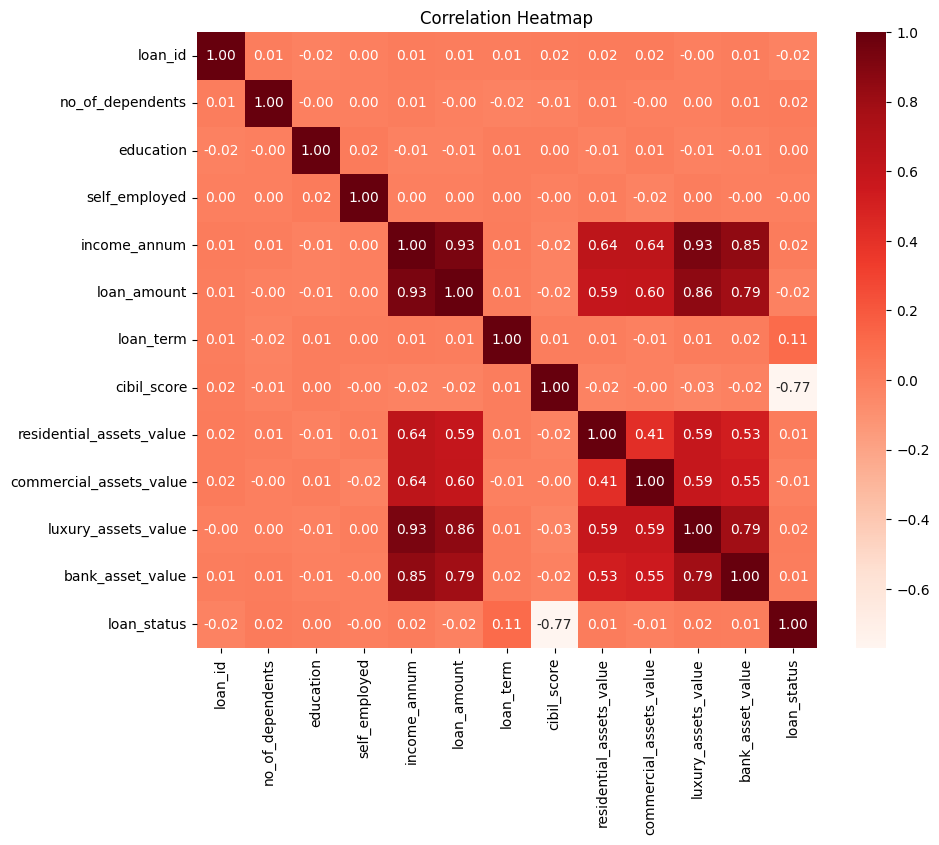

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='Reds',fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Cibil Score and loan term are correlated with loan_status than other features

In [11]:
# sns.pairplot(df, hue='loan_status')
# plt.show()

## Train Test Split

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['loan_id','loan_status'])
y = df['loan_status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


## Logistic Regression

In [13]:
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)

In [14]:
print("Logistic Regression Report:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Report:
               precision    recall  f1-score   support

           0       0.72      0.95      0.82       531
           1       0.82      0.40      0.54       323

    accuracy                           0.74       854
   macro avg       0.77      0.67      0.68       854
weighted avg       0.76      0.74      0.71       854



---

### 🔹 Metrics Explained

#### ✅ Precision
- **Definition**: Out of all predicted positives, how many were actually correct?  
- **Formula**: `TP / (TP + FP)`  
- **Meaning**: "When the model says **YES**, how often is it right?"

#### ✅ Recall (Sensitivity or True Positive Rate)
- **Definition**: Out of all actual positives, how many did the model catch?  
- **Formula**: `TP / (TP + FN)`  
- **Meaning**: "How good is the model at finding all the **YES** cases?"

#### ✅ F1-Score
- **Definition**: Harmonic mean of Precision and Recall.  
- **Formula**: `2 * (Precision * Recall) / (Precision + Recall)`  
- **Meaning**: Balance between **precision** and **recall**. Useful when classes are imbalanced.

#### ✅ Support
- **Definition**: The number of actual examples of each class in the dataset.

---

### 🔹 Results Breakdown

#### Class 0
- **Precision = 0.72** → When the model predicted class `0`, it was correct **72% of the time**.  
- **Recall = 0.95** → Out of all actual `0`s, the model caught **95% of them**.  
- **F1-Score = 0.82** → Good balance between precision and recall.  
- **Support = 531** → There were **531 actual samples** of class `0`.

#### Class 1
- **Precision = 0.82** → When the model predicted class `1`, it was correct **82% of the time**.  
- **Recall = 0.40** → Out of all actual `1`s, the model found **40% of them**.  
- **F1-Score = 0.54** → Decent but lower than class `0`.  
- **Support = 323** → There were **323 actual samples** of class `1`.

---

### 🔹 4. Overall Scores

- **Accuracy = 0.74** → The model is correct **74% of the time** (out of 854 predictions).  
- **Macro Avg = 0.68** → Average of metrics across both classes, treating them equally.  
- **Weighted Avg = 0.71** → Average of metrics, but gives more importance to classes with more samples (since class `0` has more data than class `1`).

---

In [15]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Confusion Matrix:
 [[503  28]
 [194 129]]


## Decision Tree

In [16]:
dt = DecisionTreeClassifier(max_depth=6, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [17]:
print("Decision Tree Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       531
           1       0.99      0.93      0.96       323

    accuracy                           0.97       854
   macro avg       0.98      0.96      0.97       854
weighted avg       0.97      0.97      0.97       854



---

### 🔹 Metrics Explained

#### Class 0
- **Precision = 0.96** → When the model predicted class `0`, it was correct **96% of the time**.  
- **Recall = 0.99** → Out of all actual `0`s, the model caught **99% of them**.  
- **F1-Score = 0.98** → Excellent balance between precision and recall.  
- **Support = 531** → There were **531 actual samples** of class `0`.

#### Class 1
- **Precision = 0.99** → When the model predicted class `1`, it was correct **99% of the time**.  
- **Recall = 0.93** → Out of all actual `1`s, the model found **93% of them**.  
- **F1-Score = 0.96** → Very strong performance, slightly lower than class `0`.  
- **Support = 323** → There were **323 actual samples** of class `1`.

---

### 🔹 Overall Scores

- **Accuracy = 0.97** → The model is correct **97% of the time** (out of 854 predictions).  
- **Macro Avg = 0.97** → Average of metrics across both classes, treating them equally.  
- **Weighted Avg = 0.97** → Average of metrics, but weighted by the number of samples (class `0` has more data, so it influences the score slightly more).  

---



In [18]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

Confusion Matrix:
 [[528   3]
 [ 21 302]]


## 🎯 Final Interpretation
- The **Decision Tree** performed **exceptionally well** with very high scores in both classes.  
- It is slightly better at predicting **class 0** compared to class 1, but the difference is very small.  
- With **97% accuracy**, this model is **much stronger** than Logistic Regression (79% accuracy).  
- This indicates that the Decision Tree has captured the patterns in the data very effectively.  
